In [1]:
import pandas as pd

df = pd.read_csv('results_mnli_target_sets.csv')
df.head()

,filename,mnli_val,target_set_val
0,creative_train_0,0.742537,0.689873
1,creative_train_100000,0.816811,0.592827
2,creative_train_10000,0.809883,0.575949
3,creative_train_1000,0.800815,0.626582
4,creative_train_100,0.762506,0.609705


In [2]:
def split_train_size(f):
    for x in reversed(f.rsplit('_')):
        try:
            return int(x)
        except ValueError:
            pass
    raise ValueError(f)

def split_fname(f):
    parts = f.split('_')
    if f.startswith('train'):
        return parts[-1]
    return parts[0]


df['mnli_train_size'] = df['filename'].apply(split_train_size)
df['target_set_name'] = df['filename'].apply(split_fname)

In [3]:
df = df.sort_values(['target_set_name', 'mnli_train_size'])
df

,filename,mnli_val,target_set_val,mnli_train_size,target_set_name
18,train_0_balanced,0.770046,0.466245,0,balanced
26,train_100_balanced,0.838920,0.438819,100,balanced
34,train_500_balanced,0.797860,0.493671,500,balanced
24,train_1000_balanced,0.795110,0.466245,1000,balanced
28,train_2000_balanced,0.823026,0.497890,2000,balanced
32,train_5000_balanced,0.814671,0.476793,5000,balanced
22,train_10000_balanced,0.807539,0.447257,10000,balanced
20,train_100000_balanced,0.816913,0.487342,100000,balanced
30,train_400000_balanced,0.819052,0.483122,400000,balanced
0,creative_train_0,0.742537,0.689873,0,creative


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt


def plotter(name):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    data = df[df['target_set_name'] == name]
    ax = sns.lineplot(x="mnli_train_size", y="target_set_val",
                      marker='o', dashes=True, data=data)
    ax = sns.lineplot(x="mnli_train_size", y="mnli_val",
                      marker='o', dashes=True, data=data)
    ax.set(xscale='log')
    ax.set_title(f'acc for {name}')
    plt.legend(labels=['target set val', 'mnli matched val'])

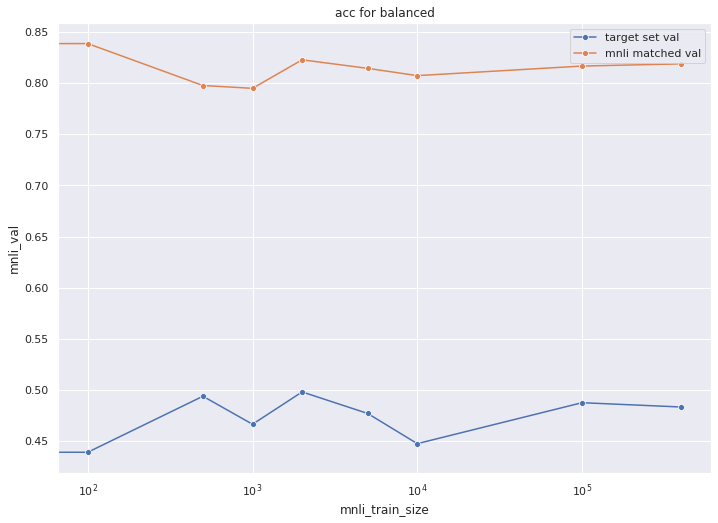

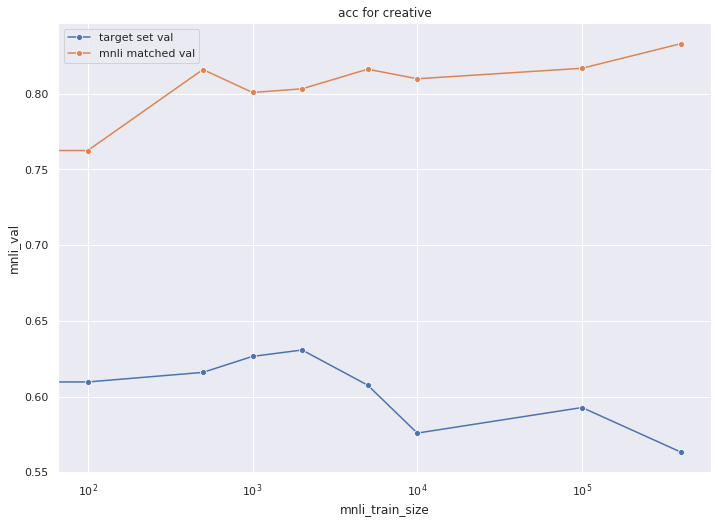

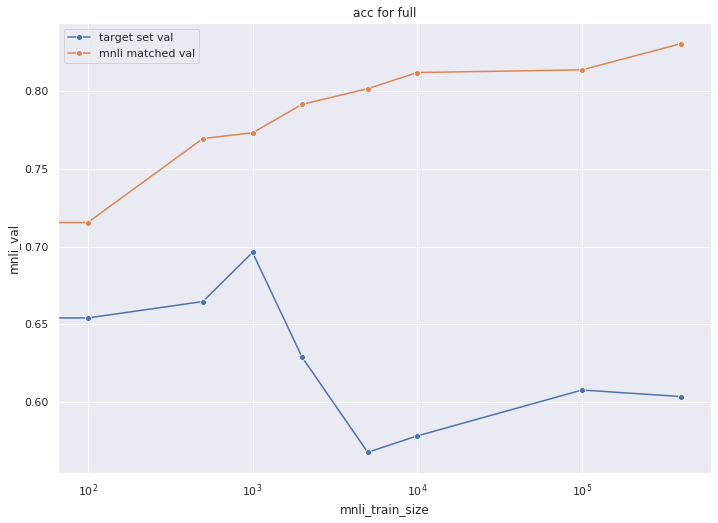

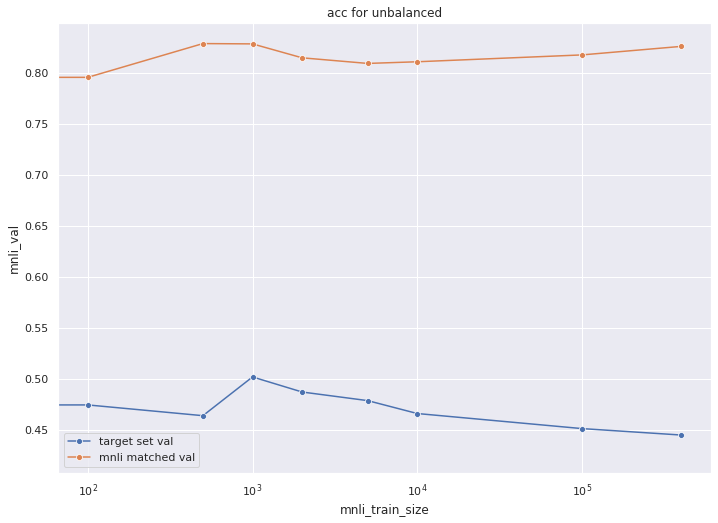

In [5]:
for name in sorted(set(df['target_set_name'])):
    plotter(name)
    plt.show()